In [10]:
%matplotlib inline

from load import author_data
import numpy as np
from sklearn.cross_validation import cross_val_score

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier

import matplotlib.pyplot as plt


Bad key "axes.spines.right" on line 210 in
//anaconda/lib/python2.7/site-packages/matplotlib/mpl-data/stylelib/classic.mplstyle.
You probably need to get an updated matplotlibrc file from
http://matplotlib.sf.net/_static/matplotlibrc or from the matplotlib source
distribution

Bad key "boxplot.flierprops.linewidth" on line 321 in
//anaconda/lib/python2.7/site-packages/matplotlib/mpl-data/stylelib/classic.mplstyle.
You probably need to get an updated matplotlibrc file from
http://matplotlib.sf.net/_static/matplotlibrc or from the matplotlib source
distribution

Bad key "contour.corner_mask" on line 306 in
//anaconda/lib/python2.7/site-packages/matplotlib/mpl-data/stylelib/classic.mplstyle.
You probably need to get an updated matplotlibrc file from
http://matplotlib.sf.net/_static/matplotlibrc or from the matplotlib source
distribution

Bad key "boxplot.vertical" on line 339 in
//anaconda/lib/python2.7/site-packages/matplotlib/mpl-data/stylelib/classic.mplstyle.
You probably need to get

In [2]:
all_data = author_data()

In [7]:
len(all_data.keys())

48

In [3]:
document_label = []
for label, docs in all_data.items():
    for d in docs:
        document_label.append((label, d))
label_index = { label: i for i, label in enumerate(all_data.keys()) }
index_label  = { i: label for i, label in enumerate(all_data.keys()) }

In [4]:
vectorizer = CountVectorizer(min_df=2, stop_words='english')
X = vectorizer.fit_transform(map(lambda x: x[1], document_label))
Y = np.array(map(lambda x: label_index[x[0]], document_label))


In [5]:
classifier = DecisionTreeClassifier()
np.mean(cross_val_score(classifier, X.toarray(), Y, cv=10))

0.94308975101331782

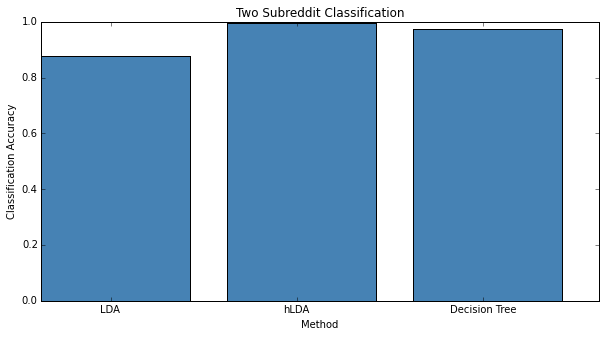

In [30]:
#anime vs. buildapc
data = {
'Decision Tree' : 0.97452149568428637,
'hLDA (40 topics)' : 0.9961538,
'LDA': 0.87692,
}
plt.figure(figsize=(10,5))

plot(data)
plt.title('Two Subreddit Classification ')
plt.xlabel('Method')
plt.ylabel('Classification Accuracy')
plt.show()

In [ ]:
#10 subreddits
data = {
'hLDA (40 topics)' : 1386./1706,
'hLDA (150 topics)' : 1410./ 1706,
'LDA': 0,
'Decision Tree' : 0.,
}

In [13]:
# authors
data = {
'hLDA' : 0.,
'LDA': 0.,
'Decision Tree' : 0.943089751,
}


In [27]:
def plot(data):
    
    width = .75
    x = np.arange(len(data))
    plt.bar(x, data.values(), color='steelblue')
    plt.xticks(x + width / 2, data.keys())
